<a href="https://colab.research.google.com/github/Seela-Duraga-Surya-Prasad/Machine-Learning/blob/main/company_univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [13]:
data=pd.read_csv('/Company_data.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [15]:
data.isnull().sum()
#to check null values are occured or not in our dataset

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [16]:
data.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [17]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [18]:
data.describe().loc['mean']

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
Name: mean, dtype: float64

<Axes: >

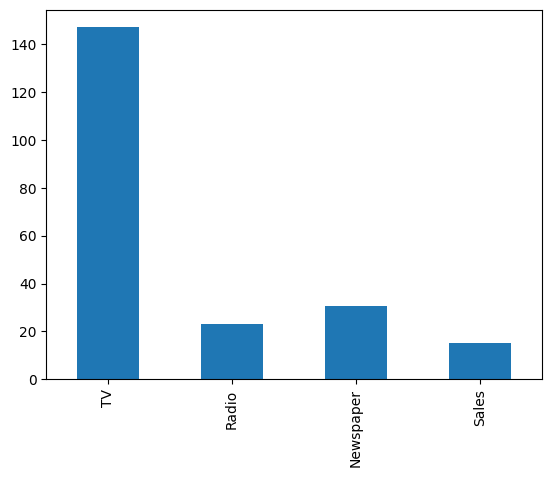

In [19]:
data.describe().loc['mean'].plot.bar()
#to show mean values in bar graph

In [20]:
c=data.corr()
c
#to get the correlation b/w columns

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

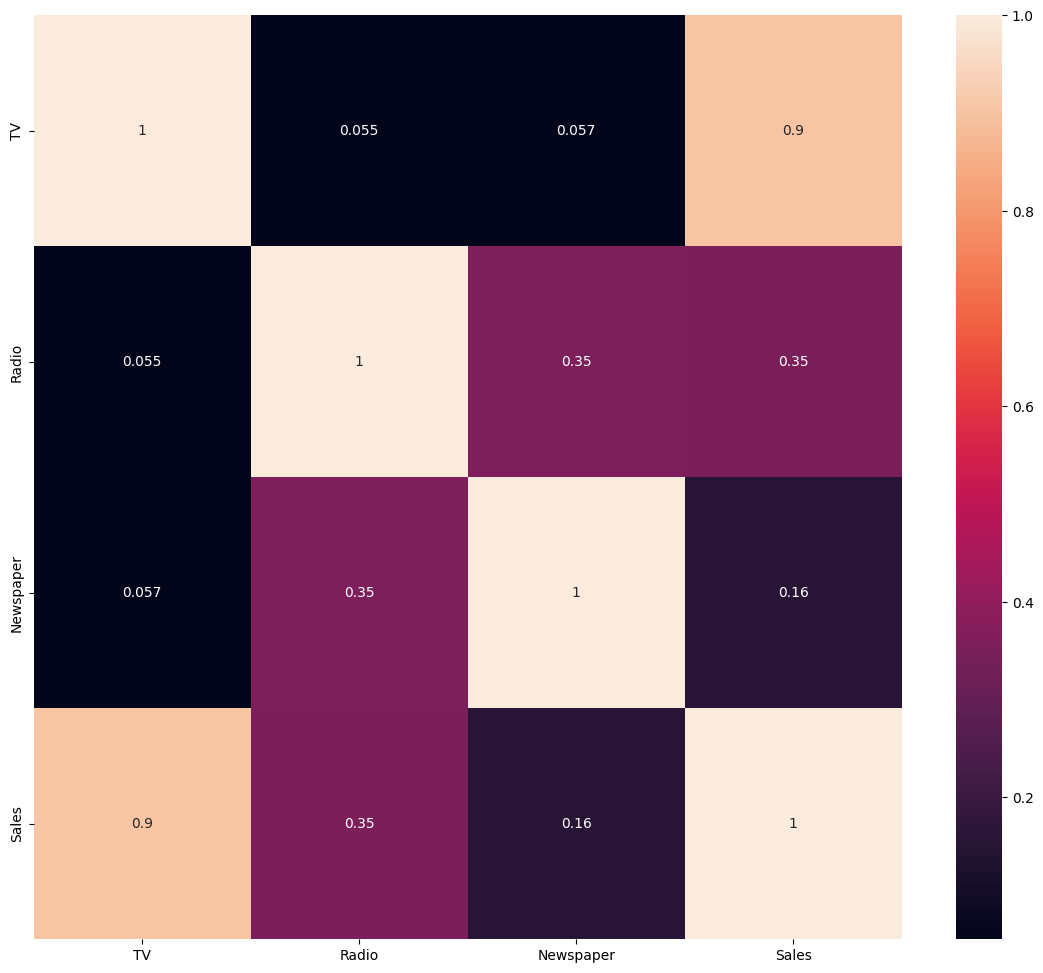

In [21]:
plt.figure(figsize=(14,12))
sb.heatmap(c,annot=True)

In [22]:
x=data['TV'].values
y=data['Sales'].values

In [23]:
x.shape,y.shape

((200,), (200,))

In [24]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [25]:
x.shape,y.shape

((200, 1), (200, 1))

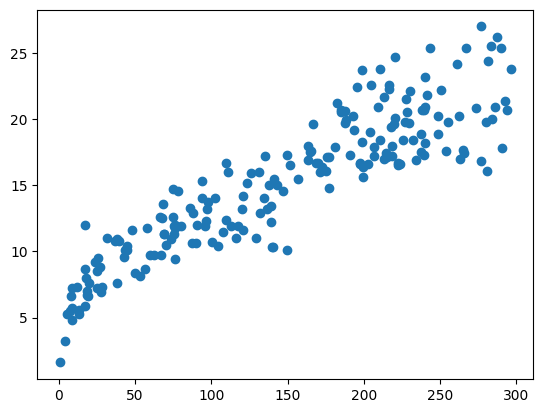

In [26]:
plt.scatter(x,y)

In [27]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=12)

In [28]:
xtrain.shape,xtest.shape

((170, 1), (30, 1))

In [29]:
reg=linear_model.LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [30]:
ypred=reg.predict(xtrain)
print('MAE = ',mean_absolute_error(ytrain,ypred))
print('MSE = ',mean_squared_error(ytrain,ypred))
print('RMSE = ',np.sqrt(mean_squared_error(ytrain,ypred)))
print('R2_score = ',r2_score(ytrain,ypred))


MAE =  1.900515036911891
MSE =  5.622189156717491
RMSE =  2.3711155932846233
R2_score =  0.7938356939002937


In [31]:
ypred2=reg.predict(xtest)
print('MAE = ',mean_absolute_error(ytest,ypred2))
print('MSE = ',mean_squared_error(ytest,ypred2))
print('RMSE = ',np.sqrt(mean_squared_error(ytest,ypred2)))
print('R2_score = ',r2_score(ytest,ypred2))

MAE =  1.4499983927182258
MSE =  2.9811920462963615
RMSE =  1.7266128825814897
R2_score =  0.9020255711915994


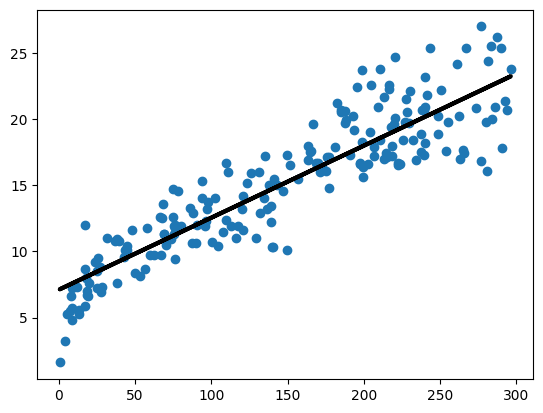

In [32]:
plt.scatter(x,y)
plt.plot(x,reg.predict(x),color='black',linewidth=3)

In [34]:
from sklearn.linear_model import Lasso
reg1=Lasso(alpha=0.2)
reg1.fit(xtrain,ytrain)

Lasso(alpha=0.2)

In [35]:
L1pred=reg1.predict(xtrain)
print('MAE = ',mean_absolute_error(ytrain,L1pred))
print('MSE = ',mean_squared_error(ytrain,L1pred))
print('RMSE = ',np.sqrt(mean_squared_error(ytrain,L1pred)))
print('R2_score = ',r2_score(ytrain,L1pred))

MAE =  1.900478444974123
MSE =  5.622194633474453
RMSE =  2.3711167481746767
R2_score =  0.7938354930689508


In [36]:
L1pred1=reg1.predict(xtest)
print('MAE = ',mean_absolute_error(ytest,L1pred1))
print('MSE = ',mean_squared_error(ytest,L1pred1))
print('RMSE = ',np.sqrt(mean_squared_error(ytest,L1pred1)))
print('R2_score = ',r2_score(ytest,L1pred1))

MAE =  1.4507106127447258
MSE =  2.9839156713348
RMSE =  1.7274014215968447
R2_score =  0.9019360614910215


In [39]:
from sklearn.linear_model import Ridge
reg2=Ridge(alpha=0.2)
reg2.fit(xtrain,ytrain)

Ridge(alpha=0.2)

In [40]:
L2pred=reg2.predict(xtrain)
print('MAE = ',mean_absolute_error(ytrain,L2pred))
print('MSE = ',mean_squared_error(ytrain,L2pred))
print('RMSE = ',np.sqrt(mean_squared_error(ytrain,L2pred)))
print('R2_score = ',r2_score(ytrain,L2pred))

MAE =  1.9005150251931906
MSE =  5.622189156718054
RMSE =  2.371115593284742
R2_score =  0.7938356939002731


In [41]:
L2pred1=reg2.predict(xtest)
print('MAE = ',mean_absolute_error(ytest,L2pred1))
print('MSE = ',mean_squared_error(ytest,L2pred1))
print('RMSE = ',np.sqrt(mean_squared_error(ytest,L2pred1)))
print('R2_score = ',r2_score(ytest,L2pred1))

MAE =  1.4499986208092683
MSE =  2.9811929167390008
RMSE =  1.7266131346480025
R2_score =  0.9020255425852168
